<a href="https://colab.research.google.com/github/RifatMuhtasim/Deep_Learning/blob/main/Learn/14.Batch_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Batch Gradient Descent

### What is the difference between Gradient Descent, Stochastic Gradient Descent and Mini Batch Gradient Descent. <br>

| Gradient Descent | Stochastic Gradient Descent | Mini Batch Gradient Descent |
|----------|----------|----------|
| 1. Use all training sample for <br> one forward pass and then <br> often adjust the weights   | 1. Use one (randomly picked) sample <br> for a forward pass <br> and adjust the weights.   | 1. Use a batch (randomly picked) <br> samples for forward pass and <br> then adjust the weights.   |
| 2. Good for small training  | 2. Good when the training set <br> is very big and we don't <br> want too much computation   | 2. Good for large training set   |


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import random

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/DeepLearningML/8_sgd_vs_gd/homeprices_banglore.csv")
df.head(5)

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [3]:
sx = MinMaxScaler()
sy = MinMaxScaler()

scaled_X = sx.fit_transform(df.drop("price", axis="columns"))
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [4]:
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [5]:
def Batch_gradient_descent(X, y_true, epochs, learning_rate=0.01):
  number_of_features = X.shape[1]
  w = np.ones(shape=(number_of_features))
  b = 0
  total_samples = X.shape[0]

  cost_list = []
  epoch_list = []

  for i in range(epochs):
    y_pred = np.dot(w, scaled_X.T) + b  # w1 * area + w2 * bedrooms
    w_gred = -(2/total_samples)*(X.T.dot(y_true - y_pred))
    b_gred = -(2/total_samples)*np.sum(y_true - y_pred)

    w = w - learning_rate * w_gred
    b = b - learning_rate * b_gred

    cost = np.mean(np.square(y_true - y_pred))
    if i%10 == 0:
      cost_list.append(cost)
      epoch_list.append(i)

  return w, b, cost, cost_list, epoch_list

In [6]:
w, b, cost, cost_list, epoch_list = Batch_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0], ), 200)
w, b, cost

(array([0.77641934, 0.745817  ]), -0.29270697048396327, 0.011596714354952787)

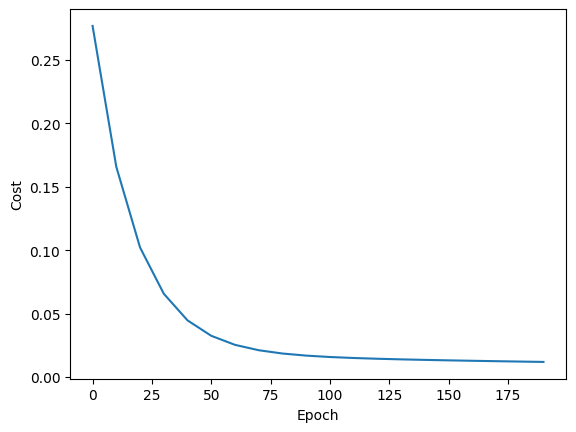

In [7]:
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.plot(epoch_list, cost_list)
plt.show()

In [8]:
def Predict(area, bedrooms, w, b):
  scaled_X = sx.transform([[area, bedrooms]])[0]
  scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
  return sy.inverse_transform([[scaled_price]])[0][0]

In [9]:
Predict(1000, 2, w, b)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


24.884614329117746

In [10]:
Predict(1000, 3, w, b)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


50.05593792209654

# Stochastic Gradient Descent

In [11]:
def Stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
  number_of_features = X.shape[1]
  # numpy array with 1 row and columns equal to number of features. In
  # our case number_of_features = 3 (area, bedroom and age)
  w = np.ones(shape=(number_of_features))
  b = 0
  total_samples = X.shape[0]

  cost_list = []
  epoch_list = []

  for i in range(epochs):
      random_index = random.randint(0,total_samples-1) # random index from total samples
      sample_x = X[random_index]
      sample_y = y_true[random_index]

      y_predicted = np.dot(w, sample_x.T) + b

      w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
      b_grad = -(2/total_samples)*(sample_y-y_predicted)

      w = w - learning_rate * w_grad
      b = b - learning_rate * b_grad

      cost = np.square(sample_y-y_predicted)

      if i%100==0: # at every 100th iteration record the cost and epoch value
          cost_list.append(cost)
          epoch_list.append(i)

  return w, b, cost, cost_list, epoch_list

In [12]:
w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = Stochastic_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0], ), 10000)
w_sgd, b_sgd, cost_sgd

(array([0.70642067, 0.67220465]), -0.22907131850415113, 0.02250120518736119)

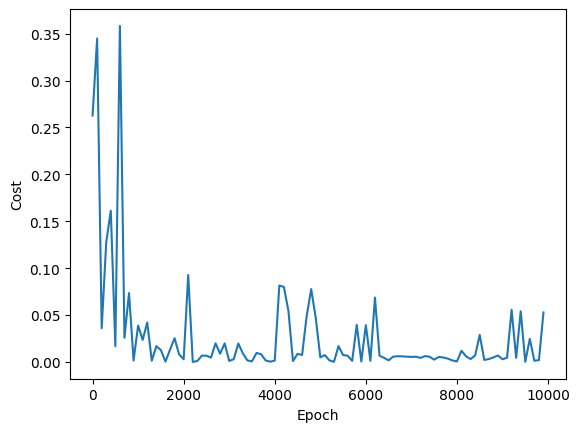

In [13]:
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.plot(epoch_list_sgd, cost_list_sgd)
plt.show()

In [14]:
Predict(1000, 3, w_sgd, b_sgd)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


53.02620614784277

# Mini Batch Gradient Descent

In [15]:
def Mini_batch_gradient_descent(X, y_true, epochs = 100, batch_size = 5, learning_rate = 0.01):

    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0] # number of rows in X

    if batch_size > total_samples: # In this case mini batch becomes same as batch gradient descent
        batch_size = total_samples

    cost_list = []
    epoch_list = []

    num_batches = int(total_samples/batch_size)

    for i in range(epochs):
        random_indices = np.random.permutation(total_samples)
        X_tmp = X[random_indices]
        y_tmp = y_true[random_indices]

        for j in range(0,total_samples,batch_size):
            Xj = X_tmp[j:j+batch_size]
            yj = y_tmp[j:j+batch_size]
            y_predicted = np.dot(w, Xj.T) + b

            w_grad = -(2/len(Xj))*(Xj.T.dot(yj-y_predicted))
            b_grad = -(2/len(Xj))*np.sum(yj-y_predicted)

            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad

            cost = np.mean(np.square(yj-y_predicted)) # MSE (Mean Squared Error)

        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)

    return w, b, cost, cost_list, epoch_list


In [16]:
w_mgd, b_mgd, cost_mgd, cost_list_mgd, epoch_list_mgd = Mini_batch_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0],), epochs = 120, batch_size = 5)
w_mgd, b_mgd, cost_mgd

(array([0.71003313, 0.6780908 ]), -0.23333084829660178, 0.004567053565271763)

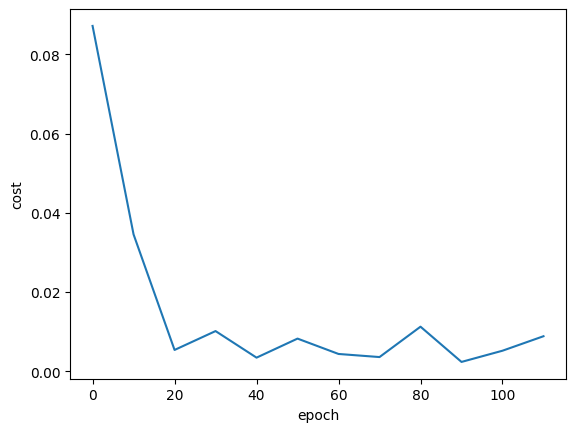

In [17]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_mgd,cost_list_mgd)